In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics
from tabulate import tabulate

In [2]:
data = pd.read_csv('CA-40 Congressional General Elections.csv')
data

,Year,Election_Type,Candidate,Party,Percent,Votes,Disqualified/Withdrawn
0,2022,General,Young Kim,Republican,56.8,"161,589",No
1,2022,General,Asif Mahmood,Democrat,43.2,"122,722",No
2,2022,Nonpartisan,Asif Mahmood,Democrat,40.9,"74,607",No
3,2022,Nonpartisan,Young Kim,Republican,34.7,"63,346",No
4,2022,Nonpartisan,Greg Raths,Republican,23.2,"42,404",No
5,2022,Nonpartisan,Nicholas Taurus,Republican,1.2,"2,193",No
6,2022,Nonpartisan,Hilaire Shioura,No Party Preference,NaN,NaN,Yes
7,2020,General,Lucille Roybal-Allard,Democrat,72.7,"135,572",No
8,2020,General,C. Antonio Delgado,Republican,27.3,"50,809",No
9,2020,Nonpartisan,Lucille Roybal-Allard,Democrat,50.7,"38,837",No


In [3]:
# Data cleaning
general_data = data[data['Election_Type'] == 'General']
general_data = general_data[general_data['Disqualified/Withdrawn'] != 'Yes']
general_data = general_data.dropna(subset=['Votes'])
general_data['Votes'] = general_data['Votes'].str.replace(',','').astype(float).astype(int) 

general_data

,Year,Election_Type,Candidate,Party,Percent,Votes,Disqualified/Withdrawn
0,2022,General,Young Kim,Republican,56.8,161589,No
1,2022,General,Asif Mahmood,Democrat,43.2,122722,No
7,2020,General,Lucille Roybal-Allard,Democrat,72.7,135572,No
8,2020,General,C. Antonio Delgado,Republican,27.3,50809,No
17,2018,General,Lucille Roybal-Allard,Democrat,77.3,93938,No
18,2018,General,Rodolfo Cotes Barragan,Green,22.7,27511,No
21,2016,General,Lucille Roybal-Allard,Democrat,71.4,106554,No
22,2016,General,Roman Gabriel Gonzalez,Independent,28.6,42743,No
25,2014,General,Lucille Roybal-Allard,Democrat,61.2,30208,No
26,2014,General,David Sanchez,Democrat,38.8,19171,No


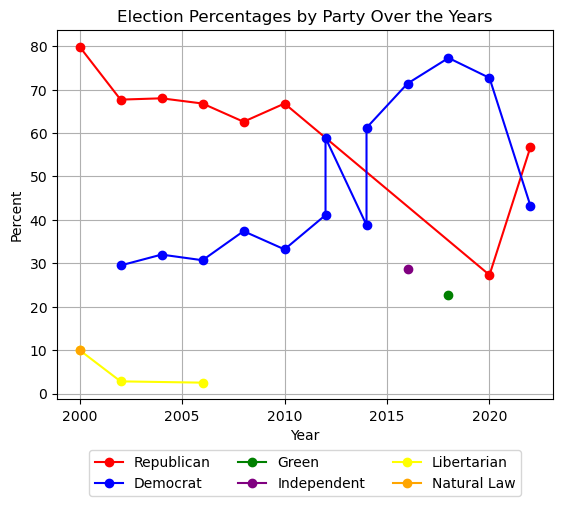

In [4]:
#graph republican and dem percent votes
congressional_percent_data = {
    'Year': general_data['Year'],
    'Party': general_data['Party'],
    'Percent': general_data['Percent']
}
congressional_percent_dF = pd.DataFrame(congressional_percent_data)

# Get the year and percent of votes for every party
election_percent_data={} 
for row in congressional_percent_dF.itertuples():
    party = row.Party
    year_percent_tuple = (row.Percent, row.Year)
    if party in election_percent_data:
        election_percent_data[party].append(year_percent_tuple)
    else:
        election_percent_data[party]=[year_percent_tuple]

party_colors = {
    'Republican': 'red',
    'Democrat': 'blue',
    'Green': 'green',
    'Libertarian': 'yellow',
    'Independent': 'purple',
    'Natural Law': 'orange'
}
for party, results in election_percent_data.items():
    percentages = [x[0] for x in results]
    years = [x[1] for x in results]
    plt.plot(years, percentages, marker='o', color=party_colors[party],label=party)
plt.xlabel('Year')
plt.ylabel('Percent')
plt.title('Election Percentages by Party Over the Years')

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.28), ncol=3)

plt.grid(True)
plt.show()

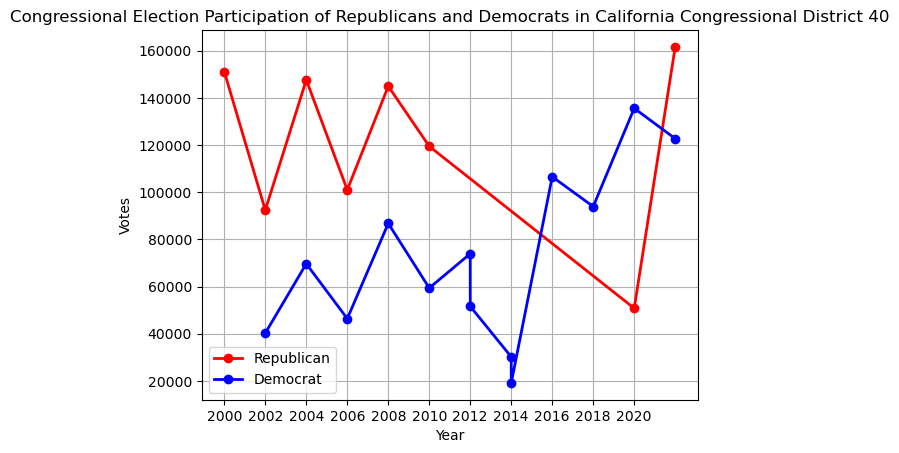

In [5]:
# republican voter turnout 
congressional_percent_data = {
    'Year': general_data['Year'],
    'Party': general_data['Party'],
    'Votes': general_data['Votes'],
}
congressional_votes_dF = pd.DataFrame(congressional_percent_data)
election_turnout_data={}
republican_turnout=[]
democrat_turnout=[]
other_party_turnout=[]
for row in congressional_votes_dF.itertuples():
    party = row.Party
    year_vote_tuple = (row.Votes, row.Year)

    if party  == 'Republican':
        republican_turnout.append(year_vote_tuple)
    elif party == 'Democrat':
        democrat_turnout.append(year_vote_tuple)
    else:
        other_party_turnout.append(year_vote_tuple)

republican_turnout = sorted(republican_turnout, key=lambda x: x[1])
democrat_turnout = sorted(democrat_turnout, key=lambda x: x[1])
republican_years = [x[1] for x in republican_turnout]
republican_votes = [x[0] for x in republican_turnout]

democrat_years = [x[1] for x in democrat_turnout]
democrat_votes = [x[0] for x in democrat_turnout]

plt.plot(republican_years, republican_votes, marker='o', color='red', label='Republican', linestyle='-', linewidth=2)
plt.plot(democrat_years, democrat_votes, marker='o', color='blue', label='Democrat', linestyle='-', linewidth=2)

plt.xticks(range(2000, 2022, 2))

plt.xlabel('Year')
plt.ylabel('Votes')
plt.title('Congressional Election Participation of Republicans and Democrats in California Congressional District 40')
plt.legend()
plt.grid(True)
plt.show()


[(151069, 2000), (92422, 2002), (147617, 2004), (100995, 2006), (144923, 2008), (119455, 2010), (50809, 2020), (161589, 2022), (40265, 2002), (69684, 2004), (46418, 2006), (86772, 2008), (59400, 2010), (73940, 2012), (51613, 2012), (30208, 2014), (19171, 2014), (106554, 2016), (93938, 2018), (135572, 2020), (122722, 2022), (27511, 2018), (42743, 2016), (3876, 2006), (3955, 2002), (18924, 2000), (19029, 2000)]


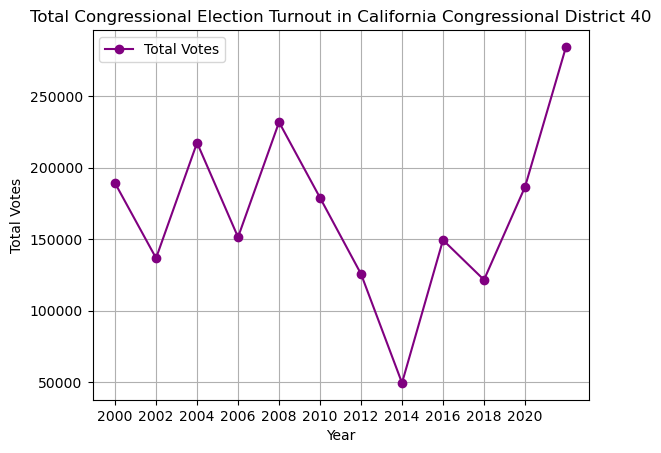

In [6]:
composite_participation = republican_turnout + democrat_turnout + other_party_turnout
print(composite_participation)
aggregate_composite_participation = {} # key:year value: votes
for votes, year in composite_participation:
    if year in aggregate_composite_participation:
        aggregate_composite_participation[year] += votes
    else:
        aggregate_composite_participation[year] = votes
#print("aggregate_composite_participation:",aggregate_composite_participation)
aggregate_composite_participation=dict(sorted(aggregate_composite_participation.items()))
#aggregate_composite_participation

plt.plot(aggregate_composite_participation.keys(),aggregate_composite_participation.values(),marker='o', color='purple', label='Total Votes')
plt.xlabel('Year')
plt.ylabel('Total Votes')
plt.title('Total Congressional Election Turnout in California Congressional District 40')
plt.legend()
plt.xticks(range(2000,2022,2))
plt.grid(True)
plt.show()

In [7]:
# now do the same thing but for senators across the entirity of California
# also get the economic and demographic(racial and gender) breakdown of the voters

In [18]:
data = pd.read_csv('CA-40 Senatorial General Elections.csv')

data['Party'] = data['Party'].replace('Miscellaneous', 'Other')
data['Party'] = data['Party'].replace('Democratic', 'Democrat')
#data['Party'] = data['Party'].replace('Decline To State', 'Decline to State')
data['Percent'] = data['Percent'].str.rstrip('%').astype(float)
#int(row.Votes.replace(',', ''))
data['Votes'] = data['Votes'].str.replace(',','').astype(float).astype(int)


senatorial_percent_dF = pd.DataFrame(data)
senatorial_percent_dF


,Year,Party,Percent,Votes
9,2020,Democrat,46.42,9859577
10,2020,Republican,24.16,5132076
11,2020,American Independent,2.90,616584
12,2020,Green,0.38,81305
13,2020,Libertarian,0.87,184838
14,2020,Peace and Freedom,0.47,99983
15,2020,Unknown,0.53,112309
16,2020,Other,0.54,115174
17,2020,No Party Preference,23.72,5038390


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


{'Democrat': [(46.89, 2022), (46.42, 2020), (43.75, 2018), (45.21, 2016), (43.43, 2014), (43.33, 2012), (44.32, 2010), (43.91, 2008), (42.66, 2006), (43.23, 2004), (44.73, 2002), (45.54, 2000)], 'Republican': [(23.88, 2022), (24.16, 2020), (24.5, 2018), (26.78, 2016), (28.23, 2014), (30.11, 2012), (30.94, 2010), (32.32, 2008), (34.31, 2006), (34.98, 2004), (35.27, 2002), (34.95, 2000)], 'American Independent': [(3.5, 2022), (2.9, 2020), (2.59, 2018), (2.5, 2016), (2.69, 2014), (2.52, 2012), (2.35, 2010), (2.06, 2008), (1.98, 2006), (1.95, 2004), (1.97, 2002), (2.06, 2000)], 'Green': [(0.43, 2022), (0.38, 2020), (0.46, 2018), (0.46, 2016), (0.62, 2014), (0.63, 2012), (0.66, 2010), (0.72, 2008), (0.9, 2006), (1.0, 2004), (0.98, 2002), (0.8, 2000)], 'Libertarian': [(1.05, 2022), (0.87, 2020), (0.74, 2018), (0.66, 2016), (0.67, 2014), (0.55, 2012), (0.51, 2010), (0.49, 2008), (0.53, 2006), (0.55, 2004), (0.59, 2002), (0.6, 2000)], 'Peace and Freedom': [(0.55, 2022), (0.47, 2020), (0.38, 20

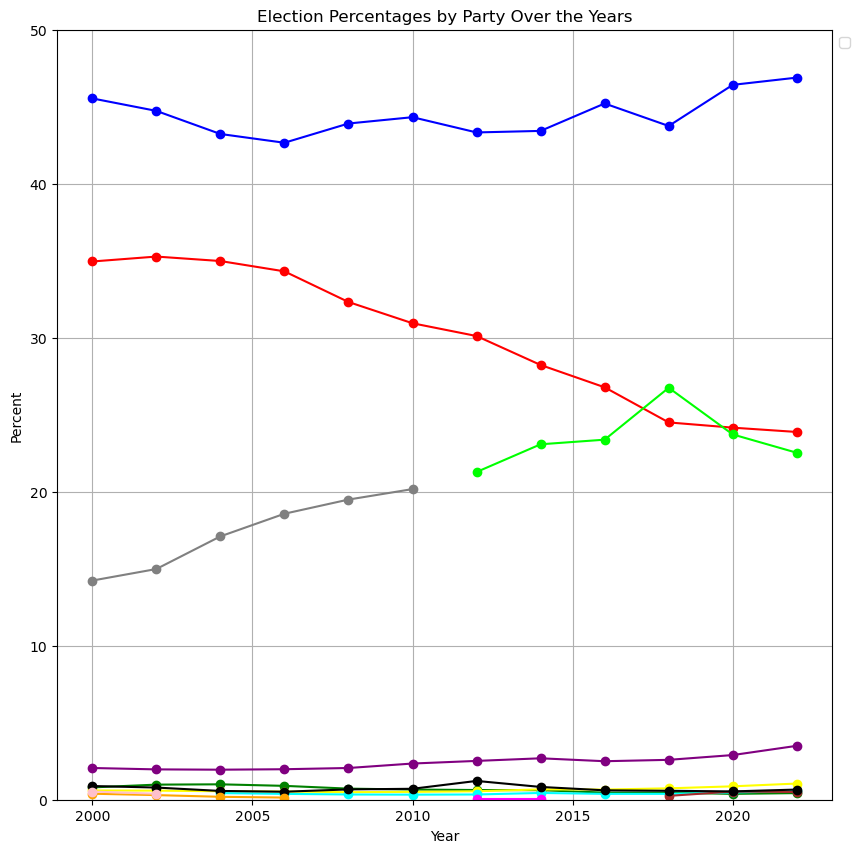

In [10]:
election_percent_data={}
for row in senatorial_percent_dF.itertuples():
    party = row.Party
    year_percent_tuple = (row.Percent, row.Year)
    if party in election_percent_data:
        election_percent_data[party].append(year_percent_tuple)
    else:
        election_percent_data[party]=[year_percent_tuple]
print(election_percent_data)
party_colors = {
    'Republican': 'red',
    'Democrat': 'blue',
    'Green': 'green',
    'Libertarian': 'yellow',
    'American Independent': 'purple',
    'Natural Law': 'orange',
    'Peace and Freedom': 'cyan',
    'Reform': 'pink',
    'Americans Elect': 'magenta',
    'Unknown': 'brown',
    'Other': 'black',
    'Decline to State': 'gray',
    'No Party Preference': 'lime'
}
plt.figure(figsize=(10, 10))
plt.xlabel('Year')
plt.ylabel('Percent')
plt.title('Election Percentages by Party Over the Years')
plt.ylim(0, 50)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
for party, results in election_percent_data.items():
    percentages = [x[0] for x in results]
    years = [x[1] for x in results]
    plt.plot(years, percentages, marker='o', color=party_colors[party],label=party)
plt.grid(True)
plt.show()

aa      Year                 Party     Votes
0    2022              Democrat  10261998
1    2022            Republican   5225578
2    2022  American Independent    766824
3    2022                 Green     95109
4    2022           Libertarian    229188
..    ...                   ...       ...
100  2000           Libertarian     91472
101  2000           Natural Law     59059
102  2000                Reform     80753
103  2000                 Other    134962
104  2000      Decline to State   2151750

[105 rows x 3 columns]


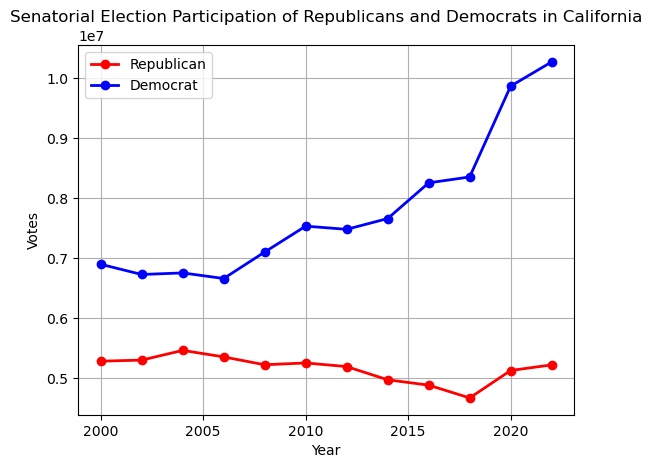

In [ ]:
# republican voter turnout 
senatorial_percent_data = {
    'Year': senatorial_percent_dF['Year'],
    'Party': senatorial_percent_dF['Party'],
    'Votes': senatorial_percent_dF['Votes'],
}
senatorial_percent_dF = pd.DataFrame(senatorial_percent_data)
election_turnout_data={}
republican_turnout=[]
democrat_turnout=[]
other_party_turnout=[]
for row in senatorial_percent_dF.itertuples():
    party = row.Party
    year_vote_tuple = (row.Votes, row.Year)    
    if party  == 'Republican':
        republican_turnout.append(year_vote_tuple)
    elif party == 'Democrat':
        democrat_turnout.append(year_vote_tuple)
    else:
        other_party_turnout.append(year_vote_tuple)

republican_turnout = sorted(republican_turnout, key=lambda x: x[1])
democrat_turnout = sorted(democrat_turnout, key=lambda x: x[1])
republican_years = [x[1] for x in republican_turnout]
republican_votes = [x[0] for x in republican_turnout]

democrat_years = [x[1] for x in democrat_turnout]
democrat_votes = [x[0] for x in democrat_turnout]

plt.plot(republican_years, republican_votes, marker='o', color='red', label='Republican', linestyle='-', linewidth=2)
plt.plot(democrat_years, democrat_votes, marker='o', color='blue', label='Democrat', linestyle='-', linewidth=2)

plt.xlabel('Year')
plt.ylabel('Votes')
plt.title('Senatorial Election Participation of Republicans and Democrats in California')
plt.legend()
plt.grid(True)
plt.show()


[(5287090, 2000), (5305038, 2002), (5466404, 2004), (5358160, 2006), (5227489, 2008), (5257669, 2010), (5197177, 2012), (4977723, 2014), (4888719, 2016), (4676247, 2018), (5132076, 2020), (5225578, 2022), (6897954, 2000), (6728110, 2002), (6754308, 2004), (6661439, 2006), (7101442, 2008), (7531986, 2010), (7478915, 2012), (7658175, 2014), (8251570, 2016), (8349565, 2018), (9859577, 2020), (10261998, 2022), (766824, 2022), (95109, 2022), (229188, 2022), (121187, 2022), (110480, 2022), (144632, 2022), (4930549, 2022), (616584, 2020), (81305, 2020), (184838, 2020), (99983, 2020), (112309, 2020), (115174, 2020), (5038390, 2020), (494183, 2018), (88134, 2018), (141368, 2018), (73366, 2018), (48082, 2018), (110293, 2018), (5105351, 2018), (456924, 2016), (84759, 2016), (121114, 2016), (69769, 2016), (111753, 2016), (4267218, 2016), (473508, 2014), (3859, 2014), (108954, 2014), (117534, 2014), (77987, 2014), (146696, 2014), (4070440, 2014), (434438, 2012), (2998, 2012), (109488, 2012), (94620

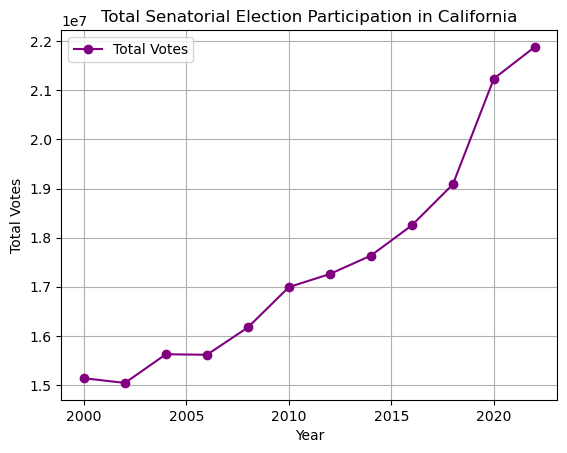

In [12]:
composite_turnout = republican_turnout + democrat_turnout + other_party_turnout
print(composite_turnout)
aggregate_composite_turnout = {}
for votes, year in composite_turnout:
    if year in aggregate_composite_turnout:
        aggregate_composite_turnout[year] += votes
    else:
        aggregate_composite_turnout[year] = votes
print("aggregate_composite_turnout:",aggregate_composite_turnout)
aggregate_composite_turnout=dict(sorted(aggregate_composite_turnout.items()))
aggregate_composite_turnout

plt.plot(aggregate_composite_turnout.keys(),aggregate_composite_turnout.values(),marker='o', color='purple', label='Total Votes')
plt.xlabel('Year')
plt.ylabel('Total Votes')
plt.title('Total Senatorial Election Participation in California')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
racial_voter_turnout = pd.read_csv('Eligible Voter Turnout Racial Breakdown.csv')
racial_voter_turnout

,Year,Latino,Asian American,Total
0,2010,28.7,24.4,43.7
1,2012,39.1,32.6,53.4
2,2014,17.3,18.4,30.9
3,2016,46.4,38.5,57.3
4,2018,34.8,32.6,48.6
5,2020,53.8,58.8,66.8
6,2022,26.4,35.3,43.0


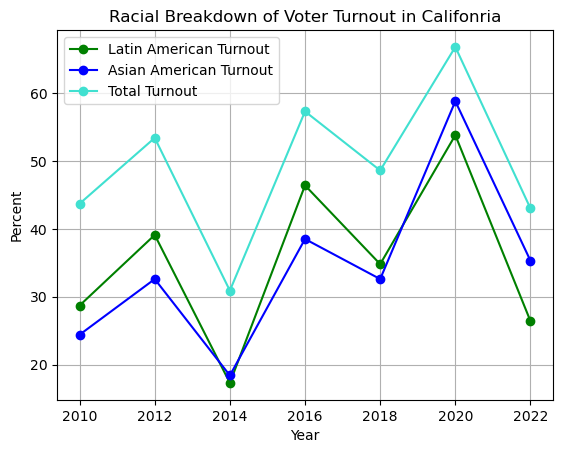

In [14]:
la_turnout = racial_voter_turnout['Latino']
aa_turnout = racial_voter_turnout['Asian American']
total_turnout = racial_voter_turnout['Total']
year = racial_voter_turnout['Year']

plt.plot(year,la_turnout,marker='o',color='green',label='Latin American Turnout')
plt.plot(year,aa_turnout,marker='o',color='blue',label='Asian American Turnout')
plt.plot(year,total_turnout,marker='o',color='turquoise',label='Total Turnout')
plt.xlabel('Year')
plt.ylabel('Percent')
plt.title('Racial Breakdown of Voter Turnout in Califonria')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
def percent_change(turnout):
    percent_change_turnout=[]
    for i in range(1,len(turnout)):
        percent_change_turnout.append(((turnout[i]-turnout[i-1])/turnout[i-1])*100)
    return percent_change_turnout

def tabulate_statistics(statistic_name,statistic):
    average_data = {
        "Category": ["Latino", "Asian American", "Total"],
        statistic_name: statistic
    }
    table_data = list(zip(average_data["Category"], average_data[statistic_name]))
    print(statistic_name)
    print(tabulate(table_data, headers=["Category", statistic_name], tablefmt="grid"))



In [16]:
avg_la_turnout = sum(la_turnout) / len(la_turnout)
avg_aa_turnout = sum(aa_turnout) / len(aa_turnout)
avg_total_turnout = sum(total_turnout) / len(total_turnout)
tabulate_statistics("Average Turnout",[avg_la_turnout, avg_aa_turnout, avg_total_turnout])

stdev_la_turnout = statistics.stdev(la_turnout)
stdev_aa_turnout = statistics.stdev(aa_turnout)
stdev_total_turnout = statistics.stdev(total_turnout)
tabulate_statistics("Standard Deviation of Turnout",[stdev_la_turnout, stdev_aa_turnout, stdev_total_turnout])

percent_change_la_turnout = percent_change(la_turnout)
percent_change_aa_turnout = percent_change(aa_turnout)
percent_change_total_turnout = percent_change(total_turnout)
year_transitions = ["2010-2012","2012-2014","2014-2016", "2016-2018","2018-2020","2020-2022"]
percent_change_turnout = {
    "Year Transitions" : year_transitions,
    "Latin American Turnout Percent Change" : percent_change_la_turnout,
    "Asian American Turnout Percent Change" : percent_change_aa_turnout,
    "Total Turnout Percent Change" : percent_change_total_turnout
}
percent_change_turnout_dF = pd.DataFrame(percent_change_turnout)
print(tabulate(percent_change_turnout_dF, headers='keys', tablefmt='grid'))

variance_la_turnout = statistics.variance(la_turnout)
variance_aa_turnout = statistics.variance(aa_turnout)
variance_total_turnout = statistics.variance(total_turnout)
tabulate_statistics("Turnout Variance",[variance_la_turnout, variance_aa_turnout, variance_total_turnout])


Average Turnout
+----------------+-------------------+
| Category       |   Average Turnout |
+================+===================+
| Latino         |           35.2143 |
+----------------+-------------------+
| Asian American |           34.3714 |
+----------------+-------------------+
| Total          |           49.1    |
+----------------+-------------------+
Standard Deviation
Standard Deviation of Turnout
+----------------+---------------------------------+
| Category       |   Standard Deviation of Turnout |
+================+=================================+
| Latino         |                         12.4289 |
+----------------+---------------------------------+
| Asian American |                         12.7505 |
+----------------+---------------------------------+
| Total          |                         11.5245 |
+----------------+---------------------------------+
Percent Change
+----+--------------------+-----------------------------------------+-----------------------